# A. Basics of Linear Algebra to Solve Systems of Equations

**Goals**
- Understand how to represent a linear system in matrix form $A\mathbf{x}=\mathbf{b}$.
- Diagnose when a system has a unique solution, infinitely many solutions, or no solution.
- Use NumPy to compute ranks, determinants, and solve or analyze systems.
- See geometric intuition in 2D (lines) and learn core algorithms (Gaussian elimination).

In [1]:
# Add this to your cells to import commonly used libraries
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

### 1. Linear systems and matrix form
A linear system with unknown vector $\mathbf{x} \in \mathbb{R}^n$ can be written as $A\mathbf{x} = \mathbf{b},$ where $A \in \mathbb{R}^{m\times n}$ is the coefficient matrix and $\mathbf{b} \in \mathbb{R}^m$.

**Augmented matrix**: $[A\mid \mathbf{b}]$ is useful for row-reduction (Gaussian elimination).

In this example below, we have two equations: 
x + y + z = 3 & 2x -y -3z = 0

In [2]:
# Add comments yourself!!!
# A small example system
import numpy as np
A = np.array([[1., 1., 1.], [2., -1., -3]])
b = np.array([3., 0.])#[:, None]
print('A =\n', A)
print('b =\n', b)
aug = np.c_[A, b]  # Syntax to create augmented matrix [A|b]
print('Augmented [A|b] =\n', aug)

A =
 [[ 1.  1.  1.]
 [ 2. -1. -3.]]
b =
 [3. 0.]
Augmented [A|b] =
 [[ 1.  1.  1.  3.]
 [ 2. -1. -3.  0.]]


### 2. Types of solutions and rank conditions
Let $r = \operatorname{rank}(A)$ and $r_a = \operatorname{rank}([A\mid \mathbf{b}])$.
- **Unique solution**: $r = r_a = n$.
- **Infinitely many solutions**: $r = r_a < n$.
- **No solution** (inconsistent): $r \neq r_a$.

For a square system ($m=n$): $\det(A) \neq 0$ $\Rightarrow$ unique solution; if $\det(A)=0$, then either infinitely many or none (check consistency).

#### 2.1 Unique solution example
We have two equations in the example below: x + y = 3 & 2x - y = 0. That's why we have a unique solution.

In [3]:
A1 = np.array([[1., 1.], [2., -1.]])
b1 = np.array([3., 0.])
rA1 = matrix_rank(A1)
rAug1 = matrix_rank(np.c_[A1, b1])
print('rank(A)=', rA1, ' rank([A|b])=', rAug1)
print('det(A)=', det(A1))

rank(A)= 2  rank([A|b])= 2
det(A)= -2.9999999999999996


Exercise- 
Plot these two functions in the same plot

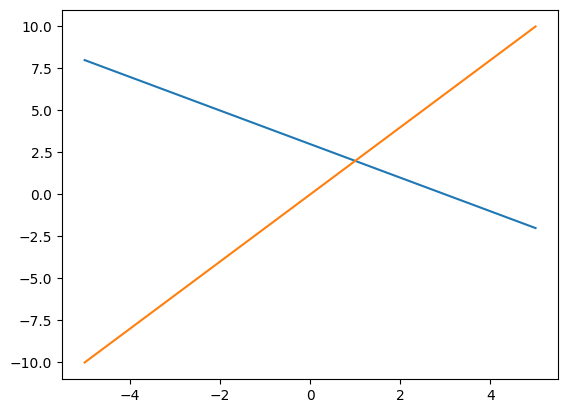

In [9]:
y1 = 3 -x
y2 = 2*x
x = np.linspace(-5,5,100)

plt.plot(x, y1, label='y=x-3')
plt.plot(x, y2, label='y=2x')

#### 2.2 Infinitely many solutions example
In this example, the second equation is a multiple of the first.

In [10]:
A2 = np.array([[1., 1.], [2., 2.]])
b2 = np.array([2., 4.])
rA2 = matrix_rank(A2)
rAug2 = matrix_rank(np.c_[A2, b2])
print('rank(A)=', rA2, ' rank([A|b])=', rAug2)
print('det(A)=', det(A2))

rank(A)= 1  rank([A|b])= 1
det(A)= 0.0


Exercise- 

Plot there two functions together in one plot: x + y = 2 & 2x + 2y = 4

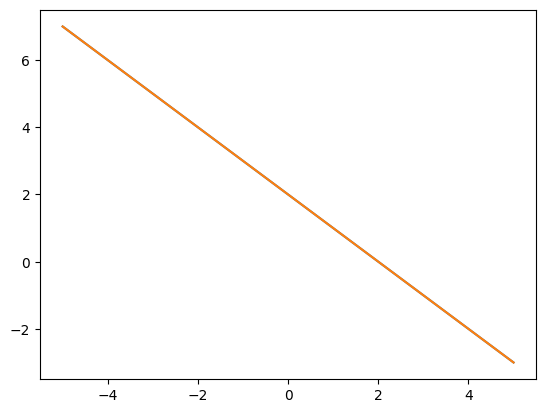

In [15]:
# Your code here
y1 = 2 - x
y2 = 2 - x
x = np.linspace(-5,5,100)

plt.plot(x, y1,)
plt.plot(x, y2,)

#### 2.3 No solution example
Parallel lines (inconsistent).

In [2]:
A3 = np.array([[1., 1.], [2., 2.]])
b3 = np.array([2., 5.])
rA3 = matrix_rank(A3)
rAug3 = matrix_rank(np.c_[A3, b3])
print('rank(A)=', rA3, ' rank([A|b])=', rAug3, ' => inconsistent')
print('det(A)=', det(A3))


rank(A)= 1  rank([A|b])= 2  => inconsistent
det(A)= 0.0


Exercise-

Plot these two functions toghether in one plot: x + y = 2 & 2x + 2y = 5

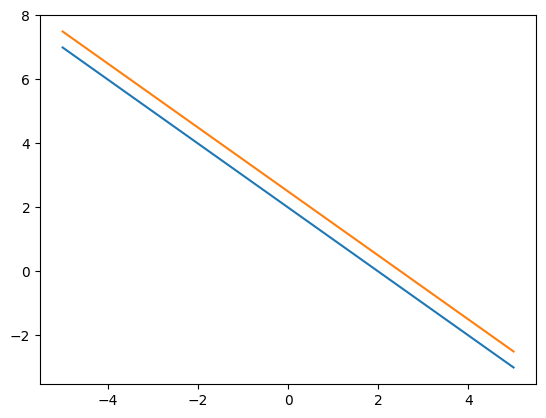

In [13]:
# Your code here
y1 = 2 - x
y2 = (5-2*x)/2
x = np.linspace(-5,5,100)
plt.plot(x, y1, label='y=2-x')
plt.plot(x, y2, label='y=(5-2x)/2')



# B. Solving Systems of Linear Equations with Python
We will explore various methods for solving systems of linear equations using Python. We will cover

1. Solving systems using `numpy.linalg.solve` and matrix inversion
2. Gauss Elimination
3. Iterative methods like Gauss-Seidel
4. Least squares method

## 1. Types of Solutions to Linear Systems
- Unique solution
- Infinite solutions
- No solution
- Geometric interpretation
- Role of rank and determinant

### Geometric interpretation in 2D
- Unique solution: two lines intersect at one point.
- Infinite solutions: coincident lines.
- No solution: parallel, distinct lines.

## 2. Direct Methods
### a. Using `np.linalg.solve`
When 1.)The coefficient matrix A is square (same number of equations as unknowns). 2.) The matrix A is full rank (i.e., its determinant is non-zero).

Don't use when 1.) The matrix is not square. 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

In [16]:
import numpy as np
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print("A=", A)
print("b=", b)
print("Augmented Matrix [A|b] =\n", np.c_[A, b])
print('rank(A)=', matrix_rank(A), ' rank([A|b])=', matrix_rank(np.c_[A, b]))
print('det(A)=', det(A))
x = np.linalg.solve(A, b)
print("Solution:\n", x)

A= [[2 1]
 [1 3]]
b= [ 8 13]
Augmented Matrix [A|b] =
 [[ 2  1  8]
 [ 1  3 13]]
rank(A)= 2  rank([A|b])= 2
det(A)= 5.000000000000001
Solution:
 [2.2 3.6]


### b. Matrix Inversion
Determinant and invertibility (square systems)
If $\det(A) \neq 0$, then $A$ is invertible and the unique solution is $\mathbf{x}=A^{-1}\mathbf{b}$. If $\det(A)=0$, the system is either inconsistent or has infinitely many solutions.

In [3]:
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print('det(A)=', det(A))

# Solve using inversion (A is square and invertible here) and show result
x = np.linalg.inv(A) @ b
print("Solution via inversion:", x)

det(A)= 5.000000000000001
Solution via inversion: [2.2 3.6]


## 3. Gaussian Elimination
Manual row operations to echelon form and back-substitution.
Below is a simple implementation with partial pivoting to reach (upper) row-echelon form and solve when a unique solution exists.

### Example-
Let's solve this system of equation:

2x + y - z = 8 

-3x - y + 2z = -11

-2x + y + 2z = -3


In [ ]:
# Your code here for Gaussian elimination step by step
# Print out the augmented matrix at each step

import numpy as np
a = np.array([[2., 1., -1.], [3., 3., 9.], [3., 4., 2.]])
b = np.array([8., 0., -5.])
n= matrix_rank(np.c_[a, b])
print("the rank is:", matrix_rank(np.c_[a, b]))



# Step 1: Initial Augmented Matrix
aug = np.c_[a, b]
print('Initial Augmented [A|b] =\n', aug)
print(aug)
A_00= aug[0][0]
for j in range(n+1):
    aug[0][j]= aug[0][j]/A_00
print(aug)
print()
A_10= aug[1][0]
for j in range(n+1):
    aug[1][j]= aug[1][j]- A_10*aug[0][j]
print(aug)
print()
A_20= aug[2][0]
for j in range(n+1):
    aug[2][j]= aug[2][j]- A_20*aug[0][j]
print(aug)
print()
A_11= aug[1][1]
for j in range(1,n+1):
    aug[1][j]= aug[1][j]/A_11 
print(aug)
print()
A_21= aug[2][1]
for j in range(1,n+1):
    aug[2][j]= aug[2][j]- A_21*aug[1][j]
print(aug)
print()
A_22= aug[2][2]
for j in range(2,n+1):
    aug[2][j]= aug[2][j]/A_22 
print(aug)
print()



# Step 2: Make pivot A[0][0] = 1

# Step 3: Eliminate A[1][0] using row 0

# Step 4: Eliminate A[2][0] using row 0
 
# Step 5: Make pivot A[1][1] = 1

# Step 6: Eliminate A[2][1] using row 1

# Step 7: Make pivot A[2][2] = 1

# Step 8: Back substitution to get final solution
print("z =", aug[2][3])
print("y =", aug[1][3] - aug[1][2]*aug[2][3])
print("x =", aug[0][3] - aug[0][2]*aug[2][3] - aug[0][1]*(aug[1][3] - aug[1][2]*aug[2][3])) 


the rank is: 3
Initial Augmented [A|b] =
 [[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]
[[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]
[[ 1.   0.5 -0.5  4. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]

[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  3.    4.    2.   -5. ]]

[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5 -17. ]]

[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    2.5   3.5 -17. ]]

[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    0.  -14.    3. ]]

[[ 1.      0.5    -0.5     4.    ]
 [ 0.      1.      7.     -8.    ]
 [ 0.      0.      1.     -0.2143]]

z = -0.21428571428571427
y = -6.5
x = 7.142857142857142


Exercise-

Use loops to do the foward elimination (i.e., make pivot and eliminate) and the back substitution for Gaussian Elimination. Draw a flow chart first. 

In [17]:
import numpy as np

def gauss_elimination_loops(A_in, b_in, pivot=True, tol=1e-12):
    A = A_in.astype(float).copy()
    b = b_in.astype(float).copy()
    n = len(b)

    # ---------- Forward elimination ----------
    for k in range(n-1):
        # Partial pivoting (recommended)
        if pivot:
            r = k + np.argmax(np.abs(A[k:, k]))
            if r != k:
                A[[k, r]] = A[[r, k]]
                b[[k, r]] = b[[r, k]]

        # Pivot check
        if abs(A[k, k]) < tol:
            raise ValueError(f"Singular or nearly singular pivot at column {k}.")

        # Eliminate entries below pivot in column k
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            b[i] -= m * b[k]
            for j in range(k, n):
                A[i, j] -= m * A[k, j]

    # ---------- Back substitution ----------
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        s = 0.0
        for j in range(i+1, n):
            s += A[i, j] * x[j]
        x[i] = (b[i] - s) / A[i, i]

    return x

# Given system
A = np.array([[2., 1., -1.],
              [3., 3.,  9.],
              [3., 4.,  2.]])
b = np.array([ 8., 0., -5.])

x = gauss_elimination_loops(A, b, pivot=True)
print("Solution x =", x)


Solution x = [ 7.1429 -6.5    -0.2143]


## 4. Iterative Method- Gauss-Seidel 

 This method solves a system of linear equations iteratively and prints the updated solution vector at each iteration until convergence.

Example-

Let's solve this system of equation:

4x_0 - x_1         = 15 

-x_0 - 4x_1 - x_2  = 10
     
     - x_1  + 3x_2 = 10


In [ ]:
import numpy as np

# Define the system of equations
A = np.array([[4.0, -1.0, 0.0],
              [-1.0, 4.0, -1.0],
              [0.0, -1.0, 3.0]])
b = np.array([15.0, 10.0, 10.0])

# Initial guess
x = np.zeros_like(b)

# Tolerance and maximum iterations
tol = 1e-6
max_iterations = 25

n = len(b)
print ("length of b array=", n)

print("Initial guess:", x)

for k in range(max_iterations):
    x_new = np.copy(x)
    print(f"Iteration {k+1}:")
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (b[i] - s1 - s2) / A[i][i]
        print(f"x[{i}] = {x_new[i]}")

    # Check for convergence
    if np.allclose(x, x_new, atol=tol):
        print("Converged!")
        break
    x = x_new

print("Final solution:")
print(x)


Exercise- 
Draw the flowchart of the code above.

## 5 Least Squares Method 
(Optional for now. We will discuss more later.)


Using `np.linalg.lstsq` for least-squares solutions.
When 1.) The matrix is not square (more equations than unknowns). 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

When a system of linear equations is **overdetermined** (more equations than unknowns), an exact solution may not exist. In such cases, we also use the **least squares method** to find an approximate solution that minimizes the residual error.

Notes
- `np.linalg.lstsq` returns the solution vector `x`, residuals, rank of matrix `A`, and singular values.
- The residuals indicate how close the solution comes to satisfying all equations.
- Least squares is widely used in **data fitting**, **regression**, and **signal processing**.

In [ ]:
import numpy as np
A = np.array([[1., 1.], [1., 2.], [1, 3]])
b = np.array([1., 2., 2.])[:, None]
print('A =\n', A)
print('b =\n', b)
#print('det(A)=', det(A))
x, residuals, rank, s = lstsq(A, b, rcond=None)
print("Rank(A) =", rank)
print("Singular values of A =", s)
print('Least-squares solution x =', x)
print('Residual ||Ax-b|| =', residuals)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-4, 4, 50)

# Define the equations
y1 = 1 - x       # x + y = 1
y2 = (2 - x) / 2 # x + 2y = 2
y3 = (2 - x) / 3 # x + 3y = 2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x + y = 1')
plt.plot(x, y2, label='x + 2y = 2')
plt.plot(x, y3, label='x + 3y = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Linear Equations')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show plot
plt.show()

## 6. Summary Table
| Method             | Type         | Pros                     | Cons                      |
|--------------------|--------------|--------------------------|---------------------------|
| `np.linalg.solve`  | Direct       | Fast, accurate           | Only for square systems   |
| Inversion          | Direct       | Conceptually simple      | Numerically unstable      |
| Gauss Elimination  | Manual       | Educational               | Tedious for large systems |
| Gauss-Seidel       | Iterative    | Good for sparse systems  | Needs convergence check   |
| Least Squares      | Overdetermined | Handles extra equations | Approximate solution      |


## Exercise Problem 1: 
Solve this system of equations using least squares method and plot the three line in one plot.
1. \(2x + y = 8\)
2. \(x + 3y = 13\)
3. \(x + y = 7\) *(Overdetermined)*



In [ ]:
# Your code here

## Exercise Problem 2
Create a $3\times 3$ system with a unique solution. Verify using rank and determinant, then solve with `solve`.

In [ ]:
# Your code here


## Exercise Problem 3
Create an inconsistent system. Compute the least-squares solution and residual norm.

In [ ]:
# Your code here

## Exercise Problem 4
Use `gaussian_elimination_solve` to solve a new square system and verify the result with `solve`.

In [ ]:
# Your code here